# Sentiment Analysis Prediction Using Naive Bayes and Logistic Regression
 Sentiment Analysis is natural Language Processing (NLP), which focuses on understanding and analyzing human language. By classifying text into positive, negative, or neutral sentiments, it helps extract valuable emotional insights from large datasets like reviews, social media posts, and feedback.


 ## Overeview:

Dataset I analysed was taken from the IMDB movie reviews dataset, which contains thousands of movie reviews with sentiment labels (positive, negative). There are two columns one is customers reviews and second columns is about the kind of sentiment


*   positive
*   negative










# Methodology



The data cleaning process was carried out in several key steps to prepare the dataset for analysis and improve the performance of the classification models:

## 1. Removing HTML Tags

To remove any unnecessary HTML markup that could interfere with text analysis.

## 2. Converting Text to Lowercase

 To standardize the text by converting everything to lowercase, avoiding duplication of words with different cases.

## 3.Removing Special Characters and Punctuation
 To eliminate irrelevant symbols and focus on meaningful words.

## 4.Removing Stopwords

To reduce noise by eliminating common words that don't carry significant meaning, such as "the," "and," and "is.
## 5.Stemming

 To reduce words to their root forms, improving uniformity and model accuracy.
 I applied stemming using NLTK’s PorterStemmer to convert words like "running" to their root form "run," which helps reduce the complexity of the data and improves model performance.








---






 #  ML algorithm
  

1.   Naive Bayes   

2.  Logistic Regression



 perdiction has done by both  machine learning models using Naive Bayes classification and Logistic Regression for sentiment analysis.

# 1- Importing important libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk .stem.porter import PorterStemmer
import warnings
warnings.filterwarnings('ignore')


# 2- Loading the dataset

In [7]:
df = pd.read_csv("/content/IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# checking data shape
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


I converted the sentiment column from categorical values ("positive" and "negative") into numeric values for efficient model processing. This transformation allows the machine learning algorithms to interpret and classify the sentiment data more effectively. Positive sentiments were encoded as 1, and negative sentiments were encoded as 0.








In [24]:
df["sentiment"].replace({"positive":1,"negative":0},inplace=True)

In [25]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# 3- Cleaning the data

In [27]:

1.#function to clean html
import re
def clean_html(text):
  clean=re.compile('<.*?>')
  return re.sub(clean,'',text)


In [28]:
df['review']=df['review'].apply(clean_html)

In [29]:
# converting into lower case
def convert_lower(text):
  return text.lower()

In [30]:
df['review']=df['review'].apply(convert_lower)

In [31]:
# removing the special character
def remove_special(text):
  x=''
  for i in text:
    if i.isalnum():
      x=x+i
    else:
      x=x+' '
  return x


In [32]:
remove_special("@/ abc")
# remove special

'   abc'

In [33]:
df['review']=df['review'].apply(remove_special)

In [47]:
# removind stop words
import nltk
from nltk.corpus import stopwords

In [55]:
 nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Optimized stopword removal function
def remove_stopwords(text):
    if text is None:  # Handle None values
        return ""


    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

In [56]:
df['review']=df['review'].apply(remove_stopwords)

In [50]:
from nltk .stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
y=[]
def stem_words(text):
  for i in text:
    y.append(ps.stem(i))
  z=y[:]
  y.clear()
  return z

In [ ]:
df['review']=df['review'].apply(stem_words)

In [ ]:
#join back all cleaning features
def join_back(list_of_words):
  return " ".join(list_of_words)

In [ ]:
df['review'] = df['review'].apply(join_back)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features= 5000)

In [60]:
x= cv.fit_transform(df['review']).toarray()
x



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.shape

(50000, 5000)

In [ ]:
x[0]

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
y =df.iloc[:,1].values
y


array([1, 1, 1, ..., 0, 0, 0])

In [62]:

# train and test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_test.shape

(10000, 5000)

In [ ]:
y_test.shape

(10000,)

# 4- ML Algorithm

# 4.1 Naive Bayes

In [64]:
from sklearn.naive_bayes import MultinomialNB
ml=MultinomialNB()
ml.fit(x_train,y_train)


MultinomialNB()

In [65]:
# checkinf test data
y_pred=ml.predict(x_test)
y_pred




array([1, 0, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print("MultinomialNB:", accuracy_score(y_test, y_pred))



MultinomialNB: 0.8318


# 4.2 logistic regression






In [17]:


from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred=lr.predict(x_test)
y_pred

array(['positive', 'negative', 'positive', ..., 'positive', 'positive',
       'negative'], dtype=object)

# 4.2.1 Evaluation

In [66]:
from sklearn.metrics import accuracy_score, f1_score ,precision_score,recall_score
f1= f1_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.85
Precision: 0.85
Recall: 0.84
F1-Score: 0.84


# 4.2.2 Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[4277,  758],
       [ 779, 4186]])

Text(95.72222222222221, 0.5, 'Actual_value')

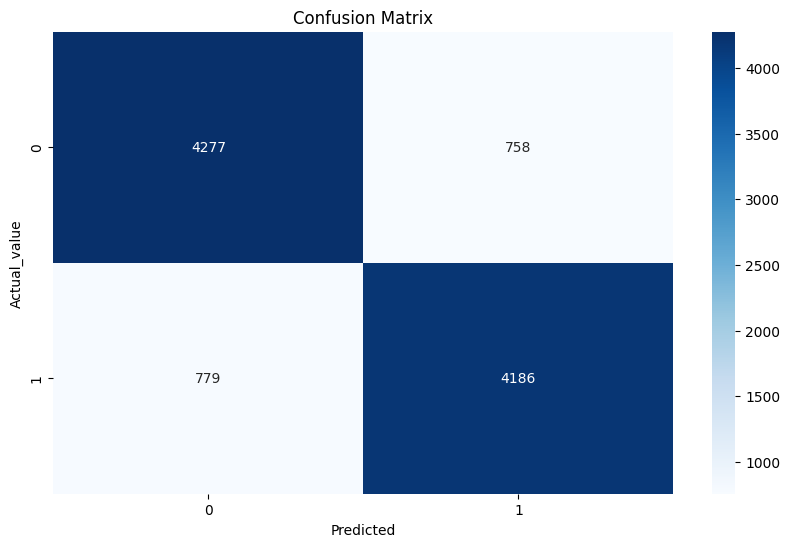

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual_value')



# Conclusion
In this project, I applied Naive Bayes and Logistic Regression models for sentiment analysis, achieving strong results. The Naive Bayes model delivered an accuracy score of 83%, demonstrating its efficiency in handling text data, while the Logistic Regression model achieved an accuracy of 85%, offering robust performance, particularly in distinguishing between more complex sentiment patterns. Both models were trained on clean, preprocessed data, and their performance highlights their effectiveness in sentiment classification tasks.
 Furthermore, I welcome suggestions from the community on how these models can be further optimized or improved. If you have any ideas regarding model tuning, feature engineering, or even trying other machine learning techniques like SVM or deep learning models, I’d love to hear them.